### Tokenización

Un Token es un conjunto de caracteres que representan texto. también podemos decir que el token es la unidad análisis de texto:

Dependiendo de la tarea que estemos afrontando, el token puede ser alguna de las siguientes:

- Una sola palabra
- Un número
- Un caracter
- Un símbolo
- Un conjunto de caracteres como "Escuela técnica" 

### Reducción de tokens

Dos palabras iguales escritas de diferente forma serán distintos Tokens p.e. "Escuelas" y "escuelas"

Para que sean tratados como la misma palabra podríamos transformar todos nuestros tokens a minusculas o mayusculas.


### Stop words

Existen diferentes Tokens que dependiendo del análisis podrían ser irrelevantes; palabras como "en", "este", "el", "las", etc. están destinadas en aparecer en todas las oraciones sin importar al tema l que hagan referencia. Estas palabras son conocidas como "stopwords". Para analisis de texto es conveniente eliminarlas.


### Lematización

Otro procedimiento que podemos usar para reducir la cantidad de tokens únicos es el proceso de lematización, que consiste en dada una forma flexionada, hallar el lema correspondiente. 

- comienza    -> comenzar
- comenzarán  -> comenzar
- clases      -> clase

In [1]:
import requests

import pyodbc
import pandas as pd

server = 'tcp:190.27.1.13\BI'
database = 'dbHighLife'
username = 'srodriguez'
password = 'Zmadgfv1'
cnxn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


In [2]:
# Librería que hará la lematización
import stanza

nlp2 = stanza.Pipeline(lang='es')



2021-04-08 08:49:15 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2021-04-08 08:49:15 INFO: Use device: cpu
2021-04-08 08:49:15 INFO: Loading: tokenize
2021-04-08 08:49:15 INFO: Loading: mwt
2021-04-08 08:49:15 INFO: Loading: pos
2021-04-08 08:49:16 INFO: Loading: lemma
2021-04-08 08:49:16 INFO: Loading: depparse
2021-04-08 08:49:17 INFO: Loading: ner
2021-04-08 08:49:20 INFO: Done loading processors!


In [ ]:
# Spacy también realiza la lematización pero es menos eficiente
import spacy
nlp = spacy.load('es_core_news_sm')

In [3]:


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt

# NLTK nos ayuda a la tokenización y la depuración de StopWords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [4]:
consulta = """ select nps_feedback, nps_reco Calif, nps_type Tipo from crm_NPs
where nps_feedback is not null and nps_feedback <>'' """

In [5]:
DF = pd.read_sql_query(consulta,cnxn)

In [6]:
DF['nps_feedback'] =DF['nps_feedback'].str.lower() 

In [7]:
DF

nps_feedback  Calif       Tipo
0                                             excelente    8.0    Passive
1     buenas promociones solamente la atención al cl...    9.0   Promoter
2     como no es una tienda grande mucho de los prod...    7.0    Passive
3     en mi ultima compra devolví un traje que a la ...   10.0   Promoter
4     la atención en galerías toluca es un experienc...    9.0   Promoter
5     la ropa al igual que la atención es excelente,...    9.0   Promoter
6                                       sigan mejorando    9.0   Promoter
7     muy buen servicio del personal, dando solucion...    9.0   Promoter
8     deberia haber más variedad para los que usamos...    8.0    Passive
9     no me parece correcto que pidan escaneados doc...    6.0  Detractor
10    el vendedor fue muy amable. atento a los detal...    9.0   Promoter
11    recomiendo plenamente a la tienda de outlet pu...    9.0   Promoter
12    siempre me ha gustado la ropa que ofrecen en c...    9.0   Promoter
13    no había personal que pudiera atenderme, tuve ...    6.0  Detractor
14    excelente servicio y atención. costo - benefició.    9.0   Promoter
15                                     excelente tienda    9.0   Promoter
16                                        buen servicio    9.0   Promoter
17    me gusta la calidad y diseño de la ropa. aunqu...    8.0    Passive
18           calidad de las prendas a precios accesbles   10.0   Promoter
19                                 tienen buen servicio    9.0   Promoter
20      felicidades, ya me urge ver la nueva colección.    9.0   Promoter
21    buen servicio a un que el envío es un poco más...    7.0    Passive
22    calidad en el producto, servicio excelente del...    9.0   Promoter
23    el motivo por el cual no los recomendaría es p...    5.0  Detractor
24                                  excelente servicio.   10.0   Promoter
25    la calidad de los productos bajo notablemente ...    3.0  Detractor
26    no me entregaron el producto que elegi, la ver...    3.0  Detractor
27    los primeros sacos que compre me quedaron gran...    5.0  Detractor
28                                        buen servicio   10.0   Promoter
29                                        buen servicio   10.0   Promoter
...                                                 ...    ...        ...
1733                                 un servicio eficaz    9.0   Promoter
1734  buena una grata experiencia, me atendieron bie...    9.0   Promoter
1735                                 muy buena atención    9.0   Promoter
1736  ser honestos desde el inicio , no digan que si...    0.0  Detractor
1737  en general fue una experiencia de lujo tanto l...    9.0   Promoter
1738  acudí a una tienda física y no encontré una ca...    8.0    Passive
1739  excelente servicio ,me encanta ir a esa sucurs...    9.0   Promoter
1740                          dulce me atendió muy bien    9.0   Promoter
1741           excelente atención de parte del vendedor    9.0   Promoter
1742                                 excelente producto    8.0    Passive
1743  las prendas que venden de excelente calidad y ...    9.0   Promoter
1744  me gustaria que me mandaran promociones o cupo...    9.0   Promoter
1745  en general todos fueron muy amables conmigo, p...    9.0   Promoter
1746        había buenos productos solo iba por camisas    9.0   Promoter
1747       excelente en plaza,américas, de xalapa, ver.    9.0   Promoter
1748  la mantención del vendedor no fue buena fue ex...    9.0   Promoter
1749                                     buena atención    9.0   Promoter
1750  capacitación al personal, en sus herramientas ...    0.0  Detractor
1751  en la tienda de perisur me cobraron 3 veces y ...    0.0  Detractor
1752  no manejan mi talla de calzado, 10 mx y eso es...    9.0   Promoter
1753                            me gusto muchas gracias    9.0   Promoter
1754    excelente servicio y amabilidad, muchas gracias    9.0   Promoter
1755                                          t

### Carga de texto

Insertamos en una o más variables el texto que vayamos a tratar.

In [8]:
Promotor = " ".join(fb for fb in DF[DF['Tipo']=='Promoter']['nps_feedback'])

Passivo = " ".join(fb for fb in DF[DF['Tipo']=='Passive']['nps_feedback'])

Detractor = " ".join(fb for fb in DF[DF['Tipo']=='Detractor']['nps_feedback'])


In [9]:
Promotor

'todo me fue bien y conseguí lo que estaba buscando, lo(a)s vendedores muy amables y pacientes. en su ramo lo mejor y muy recomendable, gracias excelente servicio sobre todo el trato el manejo del vendedor consejos y encontrar variedad de modelos y tallas muy buena, gracias. saludos. jacob, me atendió muy bien!! muchas gracias me encanta la marca y la variedad de telas y modelos hola, buenas tardes el servicio de la tienda fue excelente, la atención por parte de los empleados y del sastre fue muy buena, me fui de la tienda muy satisfecho. mi reconocimiento para todos. regresare pronto solo que los zapatos que compre estaban llenos de polvo y al ponerlos en la caja no se lo quitaron eso me desagrado, también que cobrarán la bolsa en automático sin por lo menos preguntarte si la ocupas... yo x ejemplo no la necesitaba porque estaba de viaje de negocios y básicamente la tire. pero es de mal gusto cobrar algo sin por lo menos informar estimado diego, fue una experiencia de nivel, cuando vi

### Tokenización y StopWords y eliminción de signos

- El proceso de tokenización nos devolverá un arreglo con todas las palabras.

- Creamos otro arreglo quitando esos tokens que sean signos como !"#$%&/(

- Quitamos las StopWords

- Volvemos a meter todo en un String



In [9]:
Promotor = word_tokenize(Promotor,language='spanish') #Tokenizamos
Prom = [pal for pal in Promotor if pal.isalpha()] #Quitamos signos /&$#"!"
Promc = Prom[:]

for c in Promc:
    if c in stopwords.words('spanish'):
        Prom.remove(c)

Promotor= " ".join(a for a in Prom)


### Lematización
 Por cuestiones de memoria se analizará palabra por palabra para obtener su lemma ya que si lo hacemos por todo el String el programa se cerrará.

EL proceso es pasar cada palabra al lematizador, obtener su lemma e insertarlo en un String.

In [10]:
Prom_lem=" ".join(nlp2(pal).sentences[0].words[0].lemma for pal in Prom) 

In [33]:
Prom_lem_arr=Prom_lem.split(" ")

In [34]:
Prom_lem_arr

['buen',
 'promoción',
 'solamente',
 'atención',
 'cliente',
 'cuidir',
 'detalle',
 'contestar',
 'línea',
 'telefónico',
 'ultima',
 'compra',
 'devolver',
 'traje',
 'fecha',
 'dado',
 'respuesta',
 'ir',
 'reponer',
 'junio',
 'recibir',
 'parte',
 'udo',
 'traje',
 'devolver',
 'atención',
 'galería',
 'toluca',
 'experiencia',
 'distinto',
 'tienda',
 'toluca',
 'amable',
 'atento',
 'ropa',
 'igual',
 'atención',
 'excelente',
 'servicio',
 'línea',
 'dejar',
 'desear',
 'aún',
 'devolución',
 'pendiente',
 'llevar',
 'mes',
 'seguir',
 'esperar',
 'seguir',
 'mejorar',
 'buen',
 'servicio',
 'personal',
 'dar',
 'solución',
 'ala',
 'inquietud',
 'vendedor',
 'amable',
 'atento',
 'detalle',
 'día',
 'después',
 'evento',
 'llamar',
 'saber',
 'ir',
 'recomer',
 'plenamente',
 'tienda',
 'outlet',
 'puebla',
 'servicio',
 'cliente',
 'mejor',
 'hacer',
 'sentir',
 'buen',
 'experiencia',
 'compra',
 'siempre',
 'gustar',
 'ropa',
 'ofrecer',
 'cada',
 'estación',
 'gracias',
 

In [11]:
Prom_lem

'buen promoción solamente atención cliente cuidir detalle contestar línea telefónico ultima compra devolver traje fecha dado respuesta ir reponer junio recibir parte udo traje devolver atención galería toluca experiencia distinto tienda toluca amable atento ropa igual atención excelente servicio línea dejar desear aún devolución pendiente llevar mes seguir esperar seguir mejorar buen servicio personal dar solución ala inquietud vendedor amable atento detalle día después evento llamar saber ir recomer plenamente tienda outlet puebla servicio cliente mejor hacer sentir buen experiencia compra siempre gustar ropa ofrecer cada estación gracias excelente servicio atención costo beneficiar excelente tienda buen servicio calidad prenda precio accesble buen servicio felicidad urgir ver nuevo colección calidad producto servicio excelente personal precio promoción fantástico excelente servicio buen servicio buen servicio comprar varios vez hacer buen tienda buen calidad recomendable excelente at

### Palabras frecuentes

Al igual que la Lematización, usaremos el arreglo para el conteo de palabras. Nos devolverá un diccionario con el conteo de palabras.

In [35]:
freqPro = nltk.FreqDist(Prom_lem_arr)

dict(sorted(freqPro.items(), key=lambda item: item[1], reverse=True))

{'excelente': 547,
 'servicio': 433,
 'buen': 428,
 'atención': 365,
 'tienda': 162,
 'bien': 141,
 'personal': 120,
 'atender': 120,
 'amable': 100,
 'calidad': 97,
 'vendedor': 95,
 'atento': 94,
 'gracias': 91,
 'producto': 89,
 'cliente': 71,
 'sucursal': 69,
 'compra': 65,
 'tratar': 63,
 'parte': 60,
 'siempre': 59,
 'precio': 59,
 'dar': 57,
 'hacer': 57,
 'comprar': 57,
 'traje': 53,
 'atencion': 51,
 'ropa': 50,
 'talla': 42,
 'ir': 41,
 'mejor': 41,
 'gustar': 41,
 'prenda': 41,
 'promoción': 40,
 'plaza': 38,
 'si': 37,
 'mucho': 37,
 'experiencia': 35,
 'buscar': 34,
 'felicidad': 32,
 'persona': 31,
 'encantar': 30,
 'opción': 29,
 'variedad': 28,
 'solo': 27,
 'día': 25,
 'regresar': 24,
 'poder': 24,
 'vendedora': 24,
 'súper': 23,
 'saludo': 23,
 'modelo': 22,
 'camisa': 22,
 'asesor': 22,
 'exelente': 21,
 'llegar': 21,
 'señorita': 20,
 'encontrar': 20,
 'satisfecho': 20,
 'ayudar': 20,
 'hola': 20,
 'ver': 19,
 'recibir': 18,
 'saber': 18,
 'gusto': 18,
 'querer': 18

## WordCloud

una manera de ver esta frecuencia de palabras de manera gráfica es con una Nube de palabras

Podemos pasar un texto o un diccionario con frecuencias.


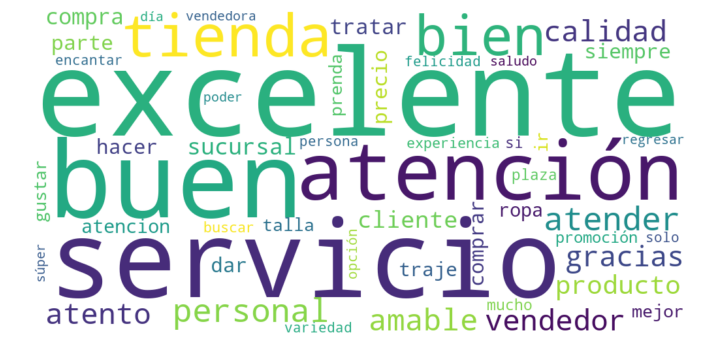

In [38]:
wordcloud = WordCloud(width=1000, height=500,max_font_size=200, max_words=50, background_color="white").fit_words(freqPro)
# De una cadena de texto...
# WordCloud.generate(Prom_lem)

# Display the generated image:
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Proceso para Detractores

In [32]:
Detractor = word_tokenize(Detractor,language='spanish') #Tokenizamos
Det = [pal for pal in Detractor if pal.isalpha()] #Quitamos signos /&$#"!"
Detc = Det[:]

for c in Detc:
    if c in stopwords.words('spanish'):
        Det.remove(c)

Detractor= " ".join(a for a in Det)

In [39]:
Det_lem=" ".join(nlp2(pal).sentences[0].words[0].lemma for pal in Det) 

In [40]:
Det_lem_arr=Det_lem.split(" ")

In [41]:
freqDet = nltk.FreqDist(Det_lem_arr)

dict(sorted(freqDet.items(), key=lambda item: item[1], reverse=True))

{'hacer': 51,
 'comprar': 49,
 'tienda': 38,
 'poder': 37,
 'decir': 32,
 'traje': 31,
 'talla': 29,
 'producto': 29,
 'compra': 27,
 'pedido': 25,
 'solo': 24,
 'buen': 23,
 'si': 23,
 'día': 22,
 'querer': 22,
 'atención': 21,
 'dar': 20,
 'quedar': 19,
 'pantalón': 19,
 'servicio': 19,
 'realizar': 18,
 'llegar': 18,
 'prenda': 17,
 'ir': 17,
 'pedir': 16,
 'atender': 16,
 'entregar': 16,
 'promoción': 16,
 'cambio': 15,
 'precio': 15,
 'después': 14,
 'saber': 14,
 'vendedor': 14,
 'dos': 13,
 'sucursal': 13,
 'mal': 13,
 'mas': 12,
 'mes': 12,
 'camisa': 12,
 'nunca': 12,
 'línea': 12,
 'ser': 11,
 'llevar': 11,
 'enviar': 11,
 'cliente': 11,
 'regresar': 11,
 'devolución': 11,
 'parecer': 10,
 'pago': 10,
 'correo': 10,
 'descuento': 10,
 'tarjeta': 10,
 'pagar': 9,
 'tú': 9,
 'respuesta': 9,
 'recibir': 9,
 'mismo': 9,
 'cobrar': 9,
 'vez': 9,
 'bolsa': 9,
 'calidad': 8,
 'linea': 8,
 'saco': 8,
 'grande': 8,
 'esperar': 8,
 'tiempo': 8,
 'ninguno': 8,
 'semana': 8,
 'fecha': 8,

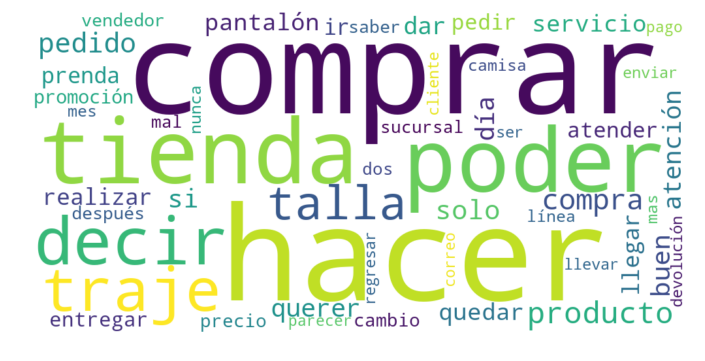

In [43]:
wordcloudDet = WordCloud(width=1000, height=500,max_font_size=200, max_words=50, background_color="white").fit_words(freqDet)
# De una cadena de texto...
# WordCloud.generate(Prom_lem)

# Display the generated image:
plt.figure(figsize=(15,6))
plt.imshow(wordcloudDet, interpolation='bilinear')
plt.axis("off")

plt.show()

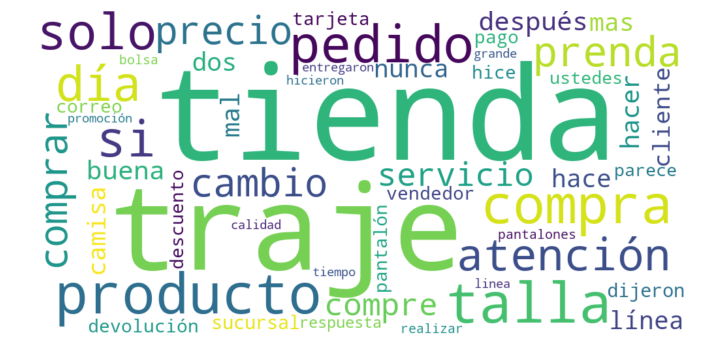

In [45]:
# TEXTO SIN LEMATIZAR

wordcloudDet2 = WordCloud(width=1000, height=500,max_font_size=200, max_words=50, background_color="white").generate(Detractor)
# De una cadena de texto...
# WordCloud.generate(Prom_lem)

# Display the generated image:
plt.figure(figsize=(15,6))
plt.imshow(wordcloudDet2, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white").generate(Promotor)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
freqDet =  nltk.FreqDist(Det)
freqPro = nltk.FreqDist(Prom)

In [ ]:
dict(sorted(freqPro.items(), key=lambda item: item[1], reverse=True))

In [ ]:
dict(sorted(freqDet.items(), key=lambda item: item[1], reverse=True))

In [ ]:
from nltk.stem.snowball import SnowballStemmer
español = SnowballStemmer('spanish')

for w in Prom:
    print(w,'  ',español.stem(w))

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=30, background_color="black").generate(Detractor)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Funcion con Spacy
oracion = nlp(Promotor)

In [ ]:
for token in oracion:
    print(token.lemma_)

In [13]:
Promoto = nlp(Promotor)
#Promotor

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:75] data. DefaultCPUAllocator: not enough memory: you tried to allocate 10905845760 bytes. Buy new RAM!

In [57]:
freqPro

FreqDist({'e': 8607, ' ': 8203, 'a': 5845, 'r': 4838, 'n': 4429, 'i': 4107, 'c': 3752, 'o': 3678, 't': 3322, 'l': 2282, ...})

In [ ]:
for sent in Promoto.sentences:
    for word in sent.words:
        print(f'word: {word.text} \tlemma: {word.lemma}') 

In [10]:
import stanza

#stanza.download('es')
nlp = stanza.Pipeline('es')

doc = nlp('El ama de llaves abrió la puerta')

#for sent in doc.sentences:
#    for word in sent.words:
#        print(f'word: {word.text} \tlemma: {word.lemma}') 

for sent in doc.sentences:
    print(sent)

2021-04-07 09:46:28 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2021-04-07 09:46:28 INFO: Use device: cpu
2021-04-07 09:46:28 INFO: Loading: tokenize
2021-04-07 09:46:28 INFO: Loading: mwt
2021-04-07 09:46:28 INFO: Loading: pos
2021-04-07 09:46:29 INFO: Loading: lemma
2021-04-07 09:46:29 INFO: Loading: depparse
2021-04-07 09:46:30 INFO: Loading: ner
2021-04-07 09:46:32 INFO: Done loading processors!


[
  {
    "id": 1,
    "text": "El",
    "lemma": "el",
    "upos": "DET",
    "xpos": "DET",
    "feats": "Definite=Def|Gender=Masc|Number=Sing|PronType=Art",
    "head": 2,
    "deprel": "det",
    "misc": "start_char=0|end_char=2",
    "ner": "O"
  },
  {
    "id": 2,
    "text": "ama",
    "lemma": "ama",
    "upos": "NOUN",
    "xpos": "NOUN",
    "feats": "Gender=Fem|Number=Sing",
    "head": 5,
    "deprel": "nsubj",
    "misc": "start_char=3|end_char=6",
    "ner": "O"
  },
  {
    "id": 3,
    "text": "de",
    "lemma": "de",
    "upos": "ADP",
    "xpos": "ADP",
    "feats": "AdpType=Prep",
    "head": 4,
    "deprel": "case",
    "misc": "start_char=7|end_char=9",
    "ner": "O"
  },
  {
    "id": 4,
    "text": "llaves",
    "lemma": "llave",
    "upos": "NOUN",
    "xpos": "NOUN",
    "feats": "Gender=Fem|Number=Plur",
    "head": 2,
    "deprel": "nmod",
    "misc": "start_char=10|end_char=16",
    "ner": "O"
  },
  {
    "id": 5,
    "text": "abrió",
    "lemma": "abrir"